## Relate Plots

In [23]:
library(ggplot2)
library(grid)
library(gridExtra)
library(ape)
library(data.table)
library(tidyverse)

## PopSize_joint from whole genome

In [24]:
popSizeFile = '~/snap_hap_repHZ/relate/estimatePopSize_joint/rel_joint.pairwise.coal'
years_per_gen = 3

In [25]:
groups   <- as.matrix(read.table(popSizeFile, nrow = 1))
t        <- years_per_gen*t(as.matrix(read.table(popSizeFile, skip = 1, nrow = 1)))
pop_size <- data.frame(time = numeric(0), pop_size = numeric(0), groups = numeric(0))
num_pops <- round(sqrt(dim(read.table(popSizeFile, skip = 2))[1]))

In [26]:
for(p1 in 1:num_pops){
  for(p2 in 1:p1){
    c        <- as.matrix(read.table(popSizeFile, skip = (p1-1) * num_pops + p2 + 1, nrow = 1))[-c(1:2)]
    str      <- rep(paste(groups[p1], "-", groups[p2], sep = ""),length(c))
    pop_size <- rbind(pop_size, data.frame(time = t, pop_size = 0.5/c, groups = str))
  }
}
pop_size$time[which(pop_size$time > 1e7)] <- 1e7

In [27]:
pop_size = as.data.table(pop_size)
pop_size

time,pop_size,groups
<dbl>,<dbl>,<chr>
0.000,17357.86,AveM-AveM
999.999,14249.85,AveM-AveM
1389.495,13190.49,AveM-AveM
1930.698,12853.90,AveM-AveM
2682.696,12669.23,AveM-AveM
3727.590,13002.82,AveM-AveM
5179.470,15696.22,AveM-AveM
7196.850,20484.92,AveM-AveM
9999.990,26381.88,AveM-AveM


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 28 rows containing missing values (`geom_step()`).”


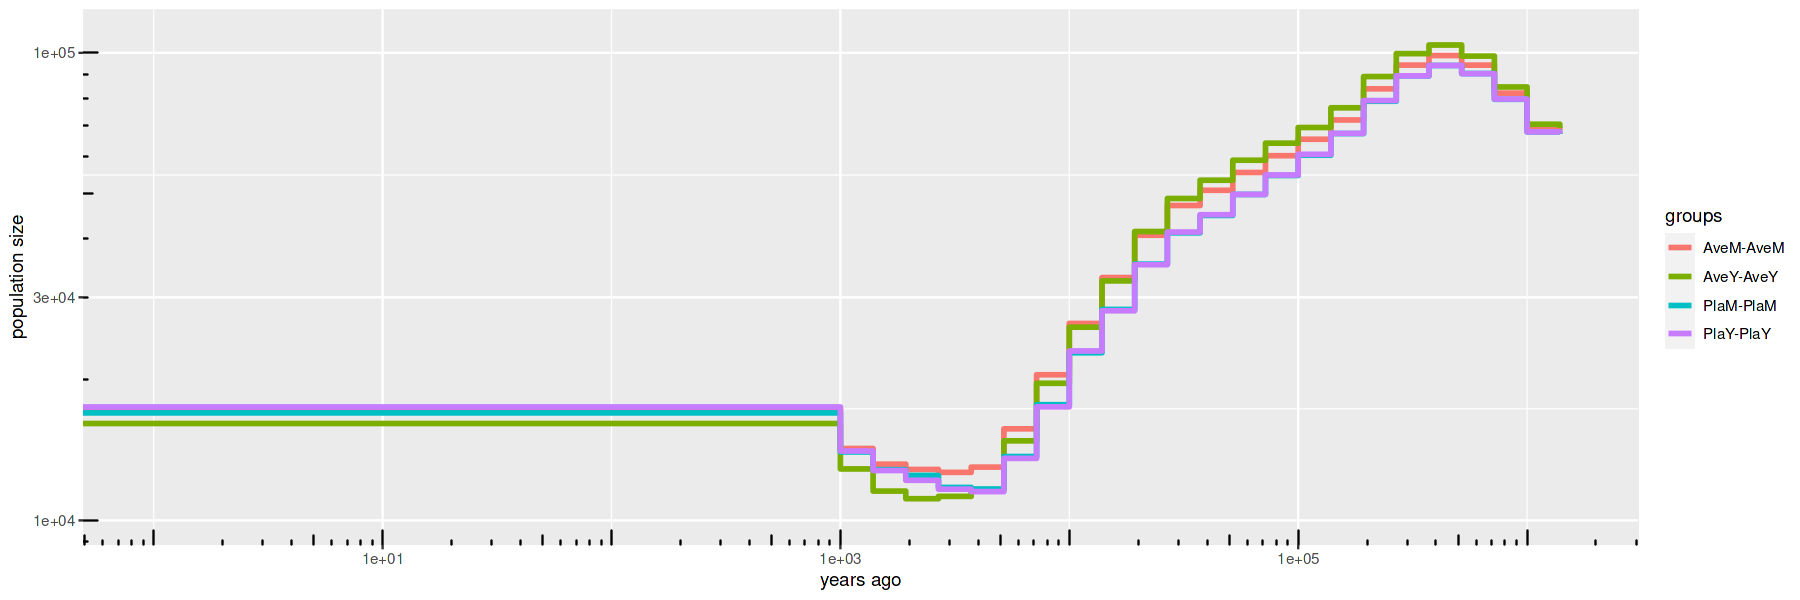

In [10]:
options(repr.plot.width=15, repr.plot.height=5)
# popsToPlot = c('AveM-AveM', 'AveY-AveY', 'PlaM-PlaM', 'PlaY-PlaY')
# ggplot(pop_size[which(pop_size$groups %in% popsToPlot),]) + 

ggplot(pop_size[groups %in% c('AveM-AveM', 'AveY-AveY', 'PlaM-PlaM', 'PlaY-PlaY')], ) + 
  geom_step(aes(time, pop_size, color = groups), lwd = 1.2) +
  scale_x_continuous(limits = c(1,1.5e6), trans="log10") + annotation_logticks(sides = "bl") +  
  scale_y_continuous(limits = c(1e4,1.1e5), trans ="log10") +
  ylab("population size") +
  xlab("years ago")

## Popsize_joint from Chr2

In [12]:
popSizeFile = './Chr2/rel_chr2.coal'
years_per_gen = 3

#read in population size
groups   <- as.matrix(read.table(popSizeFile, nrow = 1))
t        <- years_per_gen*t(as.matrix(read.table(popSizeFile, skip = 1, nrow = 1)))
pop_size <- data.frame(time = numeric(0), pop_size = numeric(0), groups = numeric(0))
num_pops <- round(sqrt(dim(read.table(popSizeFile, skip = 2))[1]))
#num_pops <- (-1 + sqrt(1 + 8 * num_pops))/2

for(p1 in 1:num_pops){
  for(p2 in 1:p1){
    c        <- as.matrix(read.table(popSizeFile, skip = (p1-1) * num_pops + p2 + 1, nrow = 1))[-c(1:2)]
    str      <- rep(paste(groups[p1]," - ",groups[p2], sep = ""),length(c))
    pop_size <- rbind(pop_size, data.frame(time = t, pop_size = 0.5/c, groups = str))
  }
}
pop_size$time[which(pop_size$time > 1e7)] <- 1e7

#plot
p1 <- ggplot(pop_size) + 
  geom_step(aes(time, pop_size, color = groups, linetype = groups), lwd = 1.2) +
  scale_x_continuous(limits = c(1,1e6), trans="log10") + annotation_logticks(sides = "bl") +  
  scale_y_continuous(trans ="log10") +
  ylab("population size") +
  xlab("years ago")

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 10 rows containing missing values (`geom_step()`).”


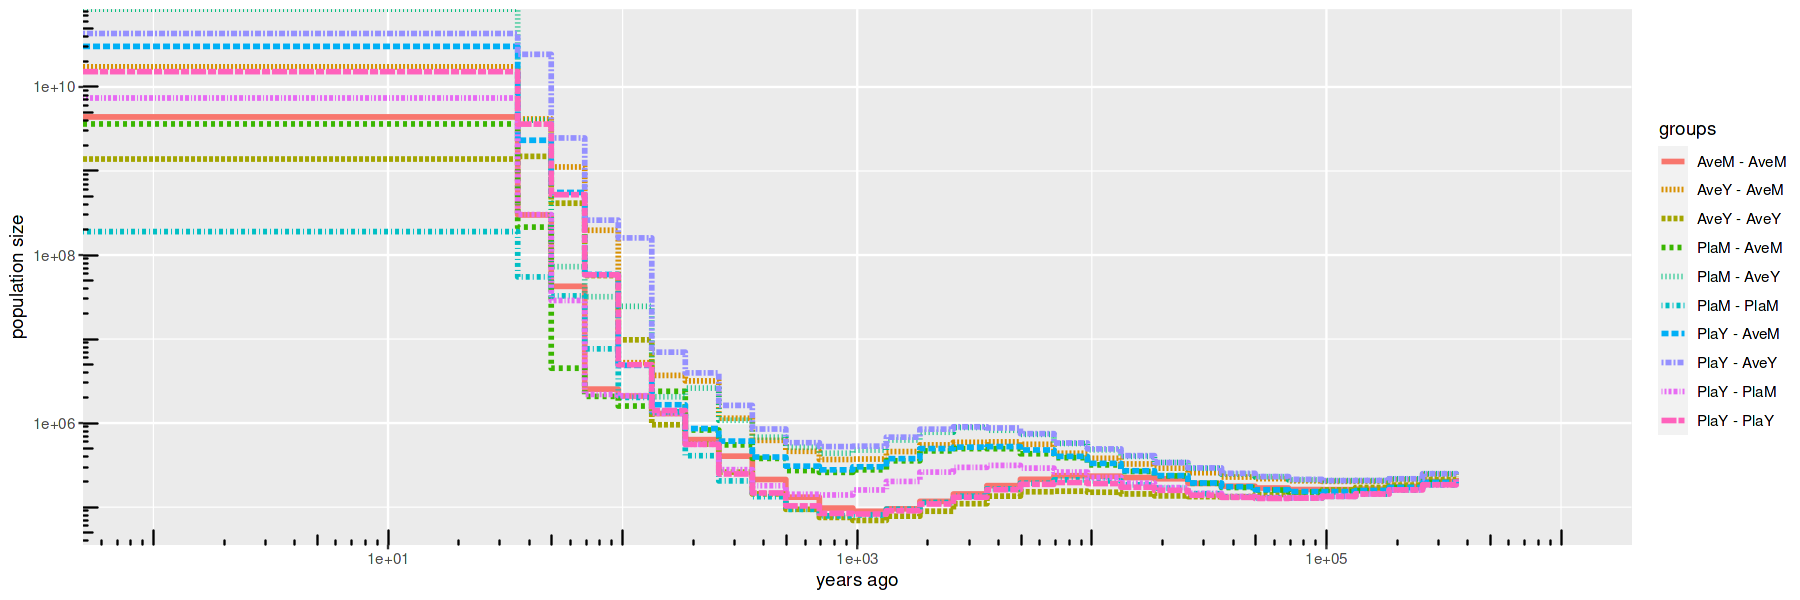

In [13]:
options(repr.plot.width=15, repr.plot.height=5, scipen=000)
p1

In [9]:
str(pop_size)

'data.frame':	310 obs. of  3 variables:
 $ time    : num  0 35.7 49.6 69 95.8 ...
 $ pop_size: num  4.40e+09 3.00e+08 4.24e+07 2.54e+06 2.10e+06 ...
 $ groups  : chr  "AveM - AveM" "AveM - AveM" "AveM - AveM" "AveM - AveM" ...


In [16]:
levels(as.factor(pop_size$groups))

[1] "AveM - AveM" "AveY - AveM" "AveY - AveY" "PlaM - AveM" "PlaM - AveY"
 [6] "PlaM - PlaM" "PlaY - AveM" "PlaY - AveY" "PlaY - PlaM" "PlaY - PlaY"

In [17]:
# pop_size$groups
AveM_AveM = subset(pop_size, groups == 'AveM - AveM')
AveM_AveY = subset(pop_size, groups == 'AveY - AveM')
AveY_AveY = subset(pop_size, groups == 'AveY - AveY')
PlaM_AveM = subset(pop_size, groups == 'PlaM - AveM')
PlaM_AveY = subset(pop_size, groups == 'PlaM - AveY')
PlaM_PlaM = subset(pop_size, groups == 'PlaM - PlaM')
PlaY_AveM = subset(pop_size, groups == 'PlaY - AveM')
PlaY_AveY = subset(pop_size, groups == 'PlaY - AveY')
PlaY_PlaM = subset(pop_size, groups == 'PlaY - PlaM')
PlaY_PlaY = subset(pop_size, groups == 'PlaY - PlaY')

In [18]:
AveM_AveM[1,1] = 1; 
AveM_AveY[1,1] = 1; 
AveY_AveY[1,1] = 1; 
PlaM_AveM[1,1] = 1
PlaM_AveY[1,1] = 1
PlaM_PlaM[1,1] = 1
PlaY_AveM[1,1] = 1
PlaY_AveY[1,1] = 1
PlaY_PlaM[1,1] = 1
PlaY_PlaY[1,1] = 1

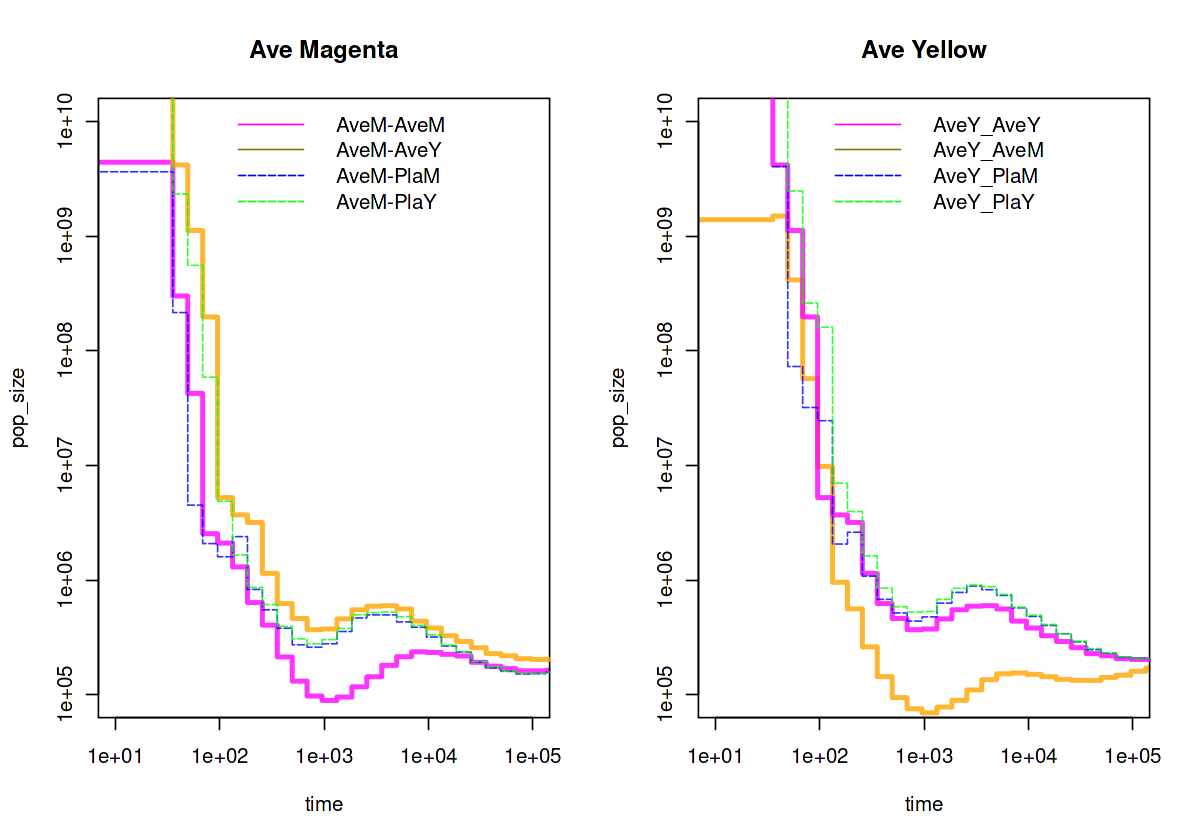

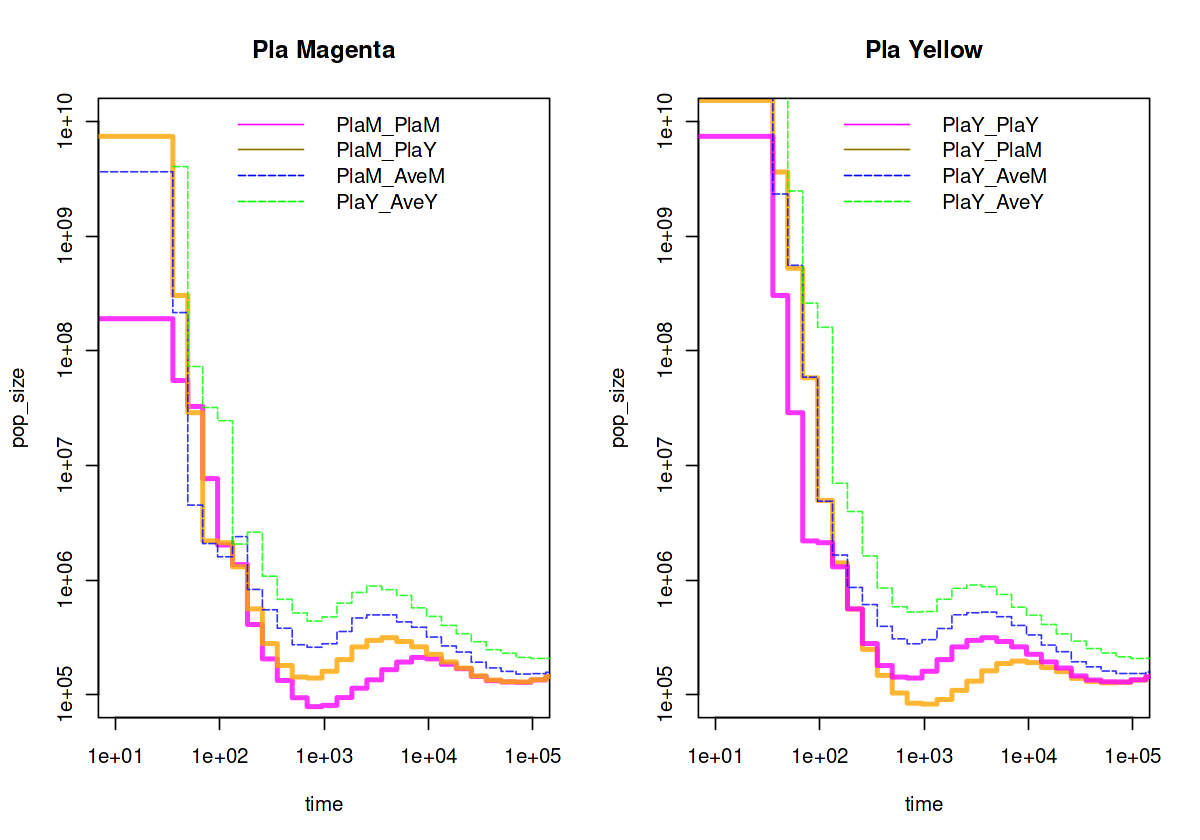

In [19]:
options(repr.plot.width=10, repr.plot.height=7)
xLim=c(10,1e5)
yLim=c(1e5,1e10)

par(mfrow=c(1,2))

plot(pop_size~time, AveM_AveM, type='s', log='xy', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim, main='Ave Magenta')
lines(pop_size~time, AveM_AveY, type='s', col=alpha('orange',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaM_AveM, type='s', col=alpha('blue',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaY_AveM, type='s', col=alpha('green',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
legend('topright', cex=1, bg=NULL, yjust=10, box.lty=0, 
       legend = c('AveM-AveM', 'AveM-AveY', 'AveM-PlaM', 'AveM-PlaY'), 
       col = c('magenta', 'gold4', 'blue', 'green'), 
       lty = c(1,1,5,5))

plot(pop_size~time, AveY_AveY, type='s', log='xy', col=alpha('orange',0.8), lwd=3, xlim=xLim, ylim=yLim, main='Ave Yellow')
lines(pop_size~time, AveM_AveY, type='s', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaM_AveY, type='s', col=alpha('blue',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaY_AveY, type='s', col=alpha('green',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
legend('topright', cex=1, bg=NULL, yjust=10, box.lty=0, 
       legend = c('AveY_AveY', 'AveY_AveM', 'AveY_PlaM', 'AveY_PlaY'), 
       col = c('magenta', 'gold4', 'blue', 'green'), 
       lty = c(1,1,5,5))

plot(pop_size~time, PlaM_PlaM, type='s', log='xy', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim, main='Pla Magenta')
lines(pop_size~time, PlaY_PlaM, type='s', col=alpha('orange',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaM_AveM, type='s', col=alpha('blue',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaM_AveY, type='s', col=alpha('green',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
legend('topright', cex=1, bg=NULL, yjust=10, box.lty=0, 
       legend = c('PlaM_PlaM', 'PlaM_PlaY', 'PlaM_AveM', 'PlaY_AveY'), 
       col = c('magenta', 'gold4', 'blue', 'green'), 
       lty = c(1,1,5,5))

plot(pop_size~time, PlaY_PlaY, type='s', log='xy', col=alpha('orange',0.8), lwd=3, xlim=xLim, ylim=yLim, main='Pla Yellow')
lines(pop_size~time, PlaY_PlaM, type='s', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaY_AveM, type='s', col=alpha('blue',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
lines(pop_size~time, PlaY_AveY, type='s', col=alpha('green',0.8), lwd=1, lty=5, xlim=xLim, ylim=yLim)
legend('topright', cex=1, bg=NULL, yjust=10, box.lty=0, 
       legend = c('PlaY_PlaY', 'PlaY_PlaM', 'PlaY_AveM', 'PlaY_AveY'), 
       col = c('magenta', 'gold4', 'blue', 'green'), 
       lty = c(1,1,5,5))

# plot(pop_size~time, PlaM, type='s', log='xy', col='magenta', lwd=3, xlim=xLim, ylim=yLim, main='Pla')
# lines(pop_size~time, PlaY, type='s', col='gold', lwd=3, xlim=xLim, ylim=yLim)

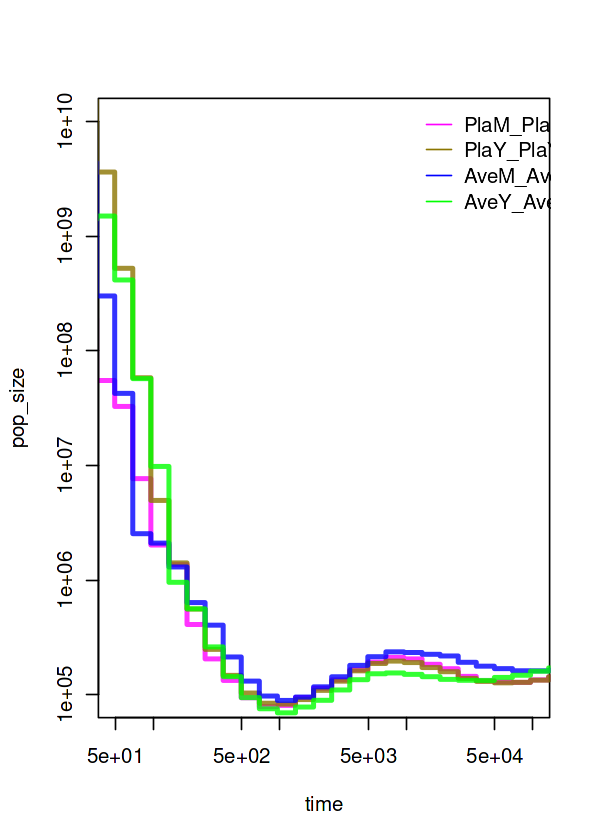

In [28]:
plot(pop_size~time, PlaM_PlaM, type='s', log='xy', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim, main='')
lines(pop_size~time, PlaY_PlaY, type='s', col=alpha('gold4',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, AveM_AveM, type='s', col=alpha('blue',0.8), lwd=3, lty=1, xlim=xLim, ylim=yLim)
lines(pop_size~time, AveY_AveY, type='s', col=alpha('green',0.8), lwd=3, lty=1, xlim=xLim, ylim=yLim)
legend('topright', cex=1, bg=NULL, yjust=10, box.lty=0, 
       legend = c('PlaM_PlaM', 'PlaY_PlaY', 'AveM_AveM', 'AveY_AveY'), 
       col = c('magenta', 'gold4', 'blue', 'green'), 
       lty = c(1,1,1,1))

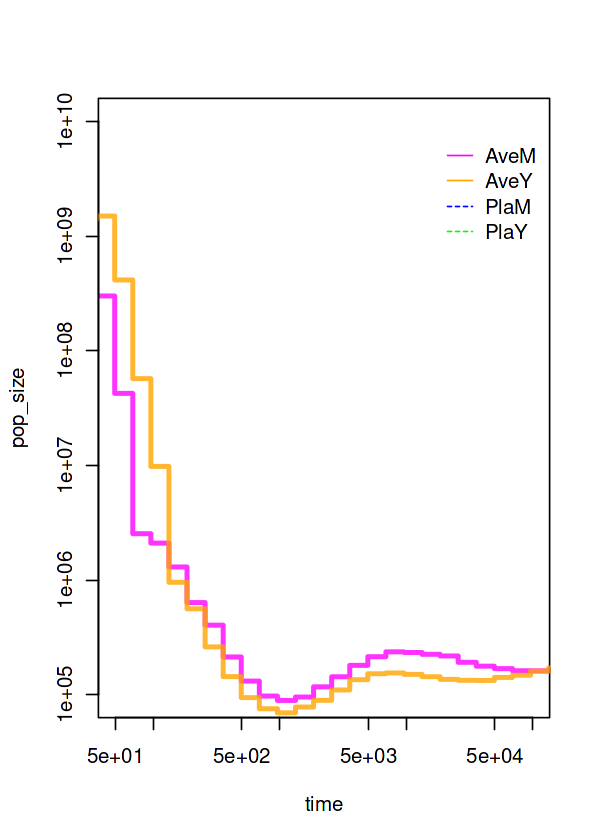

In [21]:
options(repr.plot.width=5, repr.plot.height=7)
xLim=c(50,1e5)
# xLim=c(50,1e5)

plot(pop_size~time, AveM_AveM, type='s', log='xy', col=alpha('magenta',0.8), lwd=3, xlim=xLim, ylim=yLim)
lines(pop_size~time, AveY_AveY, type='s', col=alpha('orange',0.8), lwd=3, xlim=xLim, ylim=yLim)
# lines(pop_size~time, PlaM_PlaM, type='s', col=alpha('blue',0.8), lwd=2, lty=2, xlim=xLim, ylim=yLim)
# lines(pop_size~time, PlaY_PlaY, type='s', col=alpha('green',0.8), lwd=2, lty=2, xlim=xLim, ylim=yLim)

legend('topright', cex=1, bg=NULL, box.lty=0, inset=0.05,
       legend = c('AveM', 'AveY', 'PlaM', 'PlaY'), 
       col = c('magenta', 'orange', 'blue', 'green'), 
       lty = c(1,1,2,2))

In [22]:
levels(as.factor(pop_size$groups))

[1] "AveM - AveM" "AveY - AveM" "AveY - AveY" "PlaM - AveM" "PlaM - AveY"
 [6] "PlaM - PlaM" "PlaY - AveM" "PlaY - AveY" "PlaY - PlaM" "PlaY - PlaY"

In [72]:
popSizeFile = '~/snap_hap_repHZ/relate/Chr6/rel_chr6.coal'
years_per_gen = 1

#read in population size
groups   <- as.matrix(read.table(popSizeFile, nrow = 1))
t        <- years_per_gen*t(as.matrix(read.table(popSizeFile, skip = 1, nrow = 1)))
pop_size <- data.frame(time = numeric(0), pop_size = numeric(0), groups = numeric(0))
num_pops <- round(sqrt(dim(read.table(popSizeFile, skip = 2))[1]))
#num_pops <- (-1 + sqrt(1 + 8 * num_pops))/2

for(p1 in 1:num_pops){
  for(p2 in 1:p1){
    c        <- as.matrix(read.table(popSizeFile, skip = (p1-1) * num_pops + p2 + 1, nrow = 1))[-c(1:2)]
    str      <- rep(paste(groups[p1]," - ",groups[p2], sep = ""),length(c))
    pop_size <- rbind(pop_size, data.frame(time = t, pop_size = 0.5/c, groups = str))
  }
}
pop_size$time[which(pop_size$time > 1e7)] <- 1e7

#plot
p1 <- ggplot(pop_size) + 
  geom_step(aes(time, pop_size, color = groups, linetype = groups), lwd = 1.2) +
  scale_x_continuous(limits = c(1,1e6), trans="log10") + annotation_logticks(sides = "bl") +  
  scale_y_continuous(trans ="log10") +
  ylab("population size") +
  xlab("years ago")

Warning message in scale_x_continuous(limits = c(1, 1e+06), trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_step()`).”


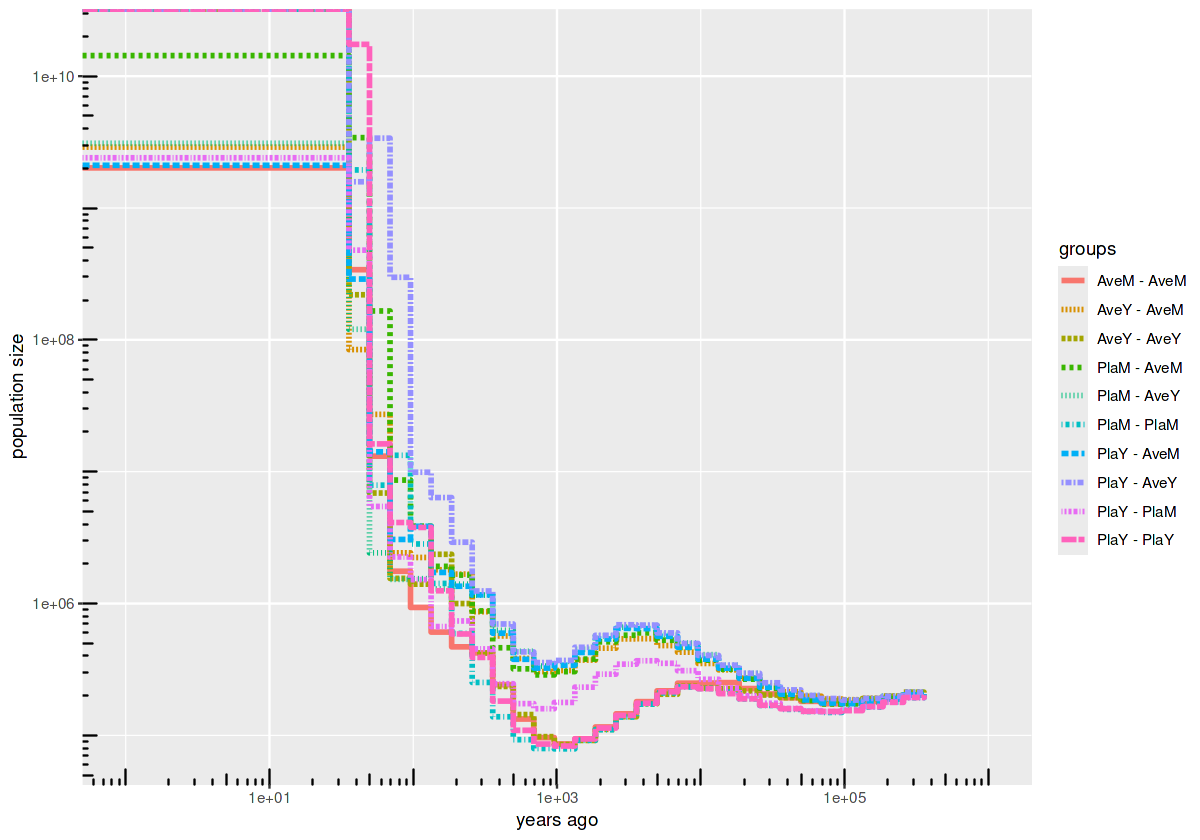

In [73]:
p1